In [1]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import STOPWORDS, WordCloud, ImageColorGenerator

In [2]:
# Disable Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [3]:
data = pd.read_csv("omicron.csv")

In [4]:
data

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1491840066506743820,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:22:43,Daily US Confirmed Covid Cases by County For M...,NaN,smcapplication,0,0,False
1,1491839660674490371,Gatherer Thompson,Corporate,I'm with the people who are with everyone. A s...,2009-05-10 23:01:22,639,1931,46369,False,2022-02-10 18:21:06,@Yascha_Mounk #CDC says number of fully #vacci...,"['CDC', 'vaccinated', 'Omicron', 'hospital']",Twitter Web App,0,0,False
2,1491839607368867842,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:20:54,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,0,0,False
3,1491839207169351689,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:19:18,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,2,1,False
4,1491839165608177667,Brownyard Group,"Bay Shore, NY",We offer liability coverage for the Security G...,2009-12-08 16:41:53,375,284,61,False,2022-02-10 18:19:08,With the #Beijing2022 #WinterOlympics already ...,"['Beijing2022', 'WinterOlympics', 'olympians',...",Agorapulse app,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17041,1499644571827019777,Self Clean Solutions,"Scotland, United Kingdom","PureZone are making clean, visible. We special...",2019-03-27 15:05:56,29,73,134,False,2022-03-04 07:15:02,As more of us head back into office environmen...,NaN,Woofy Social Media Scheduler,0,0,False
17042,1499644487705849856,Kuldip Patel,"Auckland Region, New Zealand","Love Sports, Live Sports",2011-02-07 10:32:23,47,155,4278,False,2022-03-04 07:14:42,After long time it’s such a great feeling to w...,NaN,Twitter for iPhone,0,0,False
17043,1499643983877873666,Dr Asad Khan FRCP FRACP 🇵🇸🇳🇿🇮🇳🇬🇧#FBLC,Plague Island,Lung doctor. Life on pause since Nov 20 #LongC...,2014-07-30 10:38:00,12288,1400,7564,False,2022-03-04 07:12:42,#NewZealand #LongCovidKids #Masks #ventilation...,"['NewZealand', 'LongCovidKids', 'Masks', 'vent...",Twitter for iPhone,9,54,False
17044,1499643896174989316,Dr. Melvin Sanicas | #GetVaccinated,Switzerland & Singapore,Physician 🩺 Scientist 🔬\n⚕ #TeamHalo 😷 #COVID1...,2017-07-19 15:21:32,40060,2180,22929,False,2022-03-04 07:12:21,Can a patient be co-infected with different #v...,['variants'],Twitter Web App,5,13,False


In [5]:
data.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of           id  user_name  user_location  user_description  user_created  \
0      False      False          False             False         False   
1      False      False          False             False         False   
2      False      False          False             False         False   
3      False      False          False             False         False   
4      False      False          False             False         False   
...      ...        ...            ...               ...           ...   
17041  False      False          False             False         False   
17042  False      False          False             False         False   
17043  False      False          False             False         False   
17044  False      False          False             False         False   
17045  False      False          False             False         False   

       user_followers  user_friends  user_favouri

In [6]:
data.isnull().sum()

id                     0
user_name              0
user_location       3612
user_description    1330
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            6827
source                 0
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [7]:
data = data.dropna()

In [9]:
nltk.download('stopwords', quiet=True)
stemmer = nltk.SnowballStemmer('english')
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

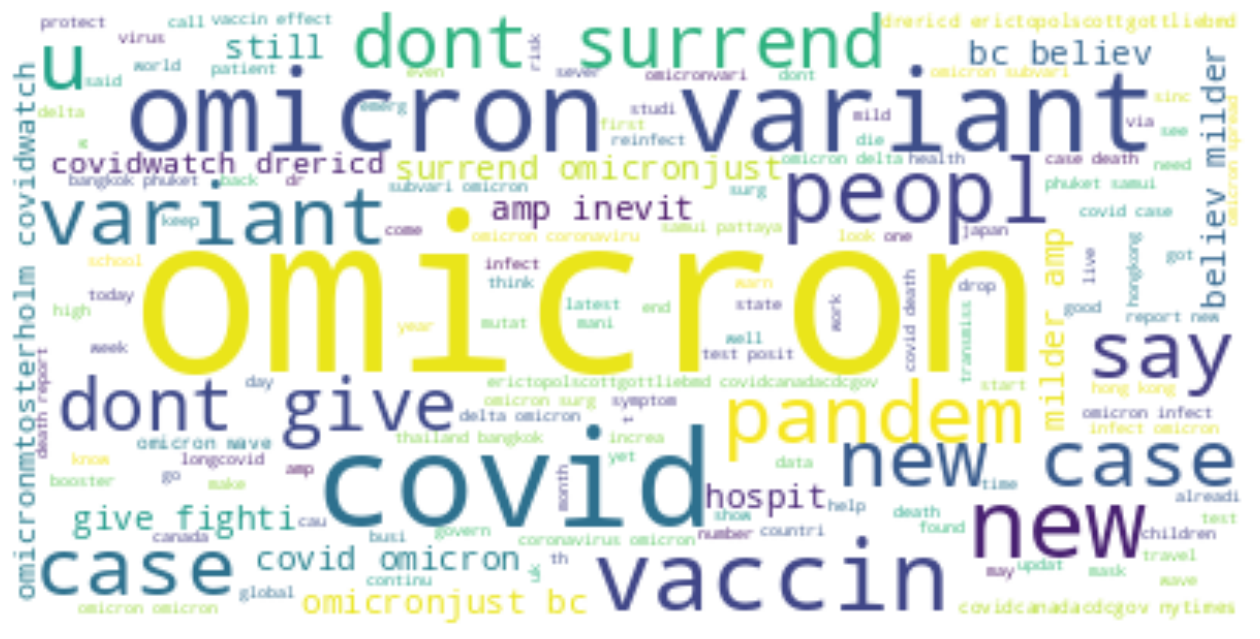

In [10]:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = "white").generate(text)
plt.figure( figsize = (16,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()